# Homework 8 writeup solutions

## Name: Jaiden Atterbury - Section B

## Problem 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

## Load in the image of Olive's perfect paws.

Below we will read in the image and find the SVD and other important information we will need for the remaining plots and problems.

In [2]:
# Load in image:
Aimg = cv2.imread('olive.jpg', 0) 

# Compute reduced SVD:
U, S, Vt = np.linalg.svd(Aimg, full_matrices=False)
S_mat = np.diag(S)

# Find r such that ebery >= 0.75:
total_energy = np.sum(S)
r = 0
for k in range(1, len(S)):
    sum_energy = sum(S[0:k])
    ratio_energy = sum_energy / total_energy
    if ratio_energy >= 0.75:
        r = k
        break

## Part (a) - 2x2 grid

(-0.5, 3023.5, 4031.5, -0.5)

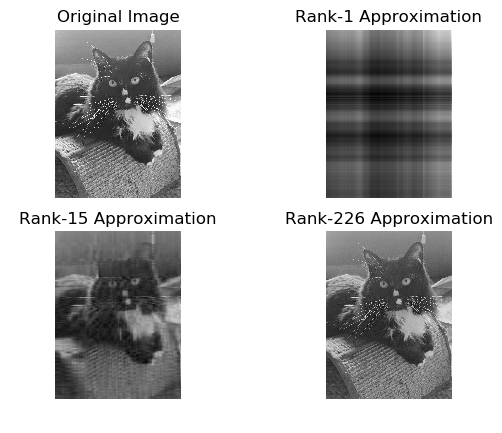

In [5]:
fig, ax = plt.subplots(2, 2)

ax[0,0].imshow(Aimg, cmap='gray')
ax[0,0].set_title('Original Image')
ax[0,0].axis('off')

rank_1 = (U[:, 0:1]@S_mat[0:1, 0:1])@Vt[0:1, :]
ax[0,1].imshow(rank_1, cmap='gray')
ax[0,1].set_title('Rank-1 Approximation')
ax[0,1].axis('off')

rank_15 = (U[:, 0:15]@S_mat[0:15, 0:15])@Vt[0:15, :]
ax[1,0].imshow(rank_15, cmap='gray')
ax[1,0].set_title('Rank-15 Approximation')
ax[1,0].axis('off')

rank_r = (U[:, 0:r]@S_mat[0:r, 0:r])@Vt[0:r, :]
ax[1,1].imshow(rank_r, cmap='gray')
ax[1,1].set_title('Rank-226 Approximation')
ax[1,1].axis('off')

## Part b - Calculate the total number of pixels for the image and its approximation.

In [9]:
pix_num_img = Aimg.shape[0] * Aimg.shape[1]
pix_num_approx = r*Aimg.shape[0] + r*Aimg.shape[1] + r

12192768
1594882
(4032, 3024)


The shape of our rank-226 approximation is (4032, 3024). However, we are actually using a lot less information than they original image since we need only the first 226 columns of $U$ the first 226 values of $\Sigma$, and the first 226 rows of $V^T$. Thus, our rank-226 approximation stores $226\cdot4032+226\cdot3024+226 = 1594882$ pixels, while the original image uses $4032\cdot3024 = 12192768$ pixels.

## Part c - Discuss

In [10]:
ratio_img = pix_num_img / pix_num_approx
ratio_approx = pix_num_approx / pix_num_img

7.644934233379021
0.1308055726148484


As calculated above, we can see that the actual image uses 7.645 times more pixels than the approximation. Furthermore, the approximation uses only 13.081% of the data. With that said,  we are capturing 75% of the information/energy in the picture using only 13.081% of the data. As can be seen in the above plots the rank-226 approximation does a great job of displaying the key aspects of the image, while only using a fraction of the data, making this image much less costly to store.